In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
#数据集读取,以CA的数据为例
filename = 'data/d5/CAvideos.csv'
data = pd.read_csv(filename)
#数据初步查看
data.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
video_id                  40881 non-null object
trending_date             40881 non-null object
title                     40881 non-null object
channel_title             40881 non-null object
category_id               40881 non-null int64
publish_time              40881 non-null object
tags                      40881 non-null object
views                     40881 non-null int64
likes                     40881 non-null int64
dislikes                  40881 non-null int64
comment_count             40881 non-null int64
thumbnail_link            40881 non-null object
comments_disabled         40881 non-null bool
ratings_disabled          40881 non-null bool
video_error_or_removed    40881 non-null bool
description               39585 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


## 1.数据摘要和可视化

### 数据摘要 

In [3]:
#标称属性取值频数统计,由于description是评论属性，因此不对此列进行计算
nominal_cols = data.columns
for c in nominal_cols:
    print('***********************%s************************'%c)
    print(data[c].value_counts())
    print('\n')

***********************video_id************************
6ZfuNTqbHE8    8
VYOjWnS4cMY    8
l_lblj8Cq0o    8
UceaB4D0jpo    8
YBpdL9hSac4    7
tCXGJQYZ9JA    7
FlsCjmMhFmw    7
9v_rtaye2yY    7
ieIeBWulAiQ    7
fGqdIPer-ms    7
VJwoSfTOhyM    7
doP7xKdGOKs    7
NV-3s2wwC8c    7
vHwOMWGAg_o    7
p8phGxzUC_Y    7
aJOTlE1K90k    7
V5cOvyDpWfM    7
Jcghl0lbDSk    7
E5yFcdPAGv0    7
GOiDjiE8haM    7
MEePYLF9Uzs    7
KM38OFDKU20    7
wbSwFU6tY1c    7
7X_WvGAhMlQ    7
ZJDMWVZta3M    7
QwievZ1Tx-8    7
My4RA5I0FKs    7
yDiXQl7grPQ    7
u9Mv98Gr5pY    7
MGYJuETPQEg    7
              ..
AxKb2V1e2yI    1
0j-r8566-FU    1
FF76ZiQOQpU    1
6gkriCS6CTE    1
JRAEzT6Xg60    1
JLG10e_IwZQ    1
C0ap0ytimSU    1
geF2uw_89vQ    1
bsH1_CHRL6U    1
I7p52SKOGZE    1
i8VDK89xXzg    1
WMm8IkkkPEI    1
9mpwlkc2a5s    1
KNaDdZNbSEA    1
aEFCUtv0DF0    1
3kHC304OGvI    1
x7HzXlEGaMo    1
NsnFg0ItNCQ    1
JKrqaPn-ulk    1
1CHOC3xCsFY    1
f6Bs62yMlqg    1
CgImeJcZEb0    1
3F_W2BKOJb4    1
oobBudrItH0    1
v6yY9HKVm

In [4]:
#数值属性的非空值、均值、标准差、最小值、4分位数、最大值
data.describe()

,category_id,views,likes,dislikes,comment_count
count,40881.000000,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04
mean,20.795553,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03
std,6.775054,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04
min,1.000000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,1.439020e+05,2.191000e+03,9.900000e+01,4.170000e+02
50%,24.000000,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03
75%,24.000000,9.633020e+05,2.871700e+04,9.500000e+02,3.713000e+03
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06


In [5]:
#属性缺失值个数
lack_cols=data.columns
for c in lack_cols:
    num = data.shape[0]-data[c].count()
    print('%s has'%c,num,'nan value...')

video_id has 0 nan value...
trending_date has 0 nan value...
title has 0 nan value...
channel_title has 0 nan value...
category_id has 0 nan value...
publish_time has 0 nan value...
tags has 0 nan value...
views has 0 nan value...
likes has 0 nan value...
dislikes has 0 nan value...
comment_count has 0 nan value...
thumbnail_link has 0 nan value...
comments_disabled has 0 nan value...
ratings_disabled has 0 nan value...
video_error_or_removed has 0 nan value...
description has 1296 nan value...


### 数据可视化

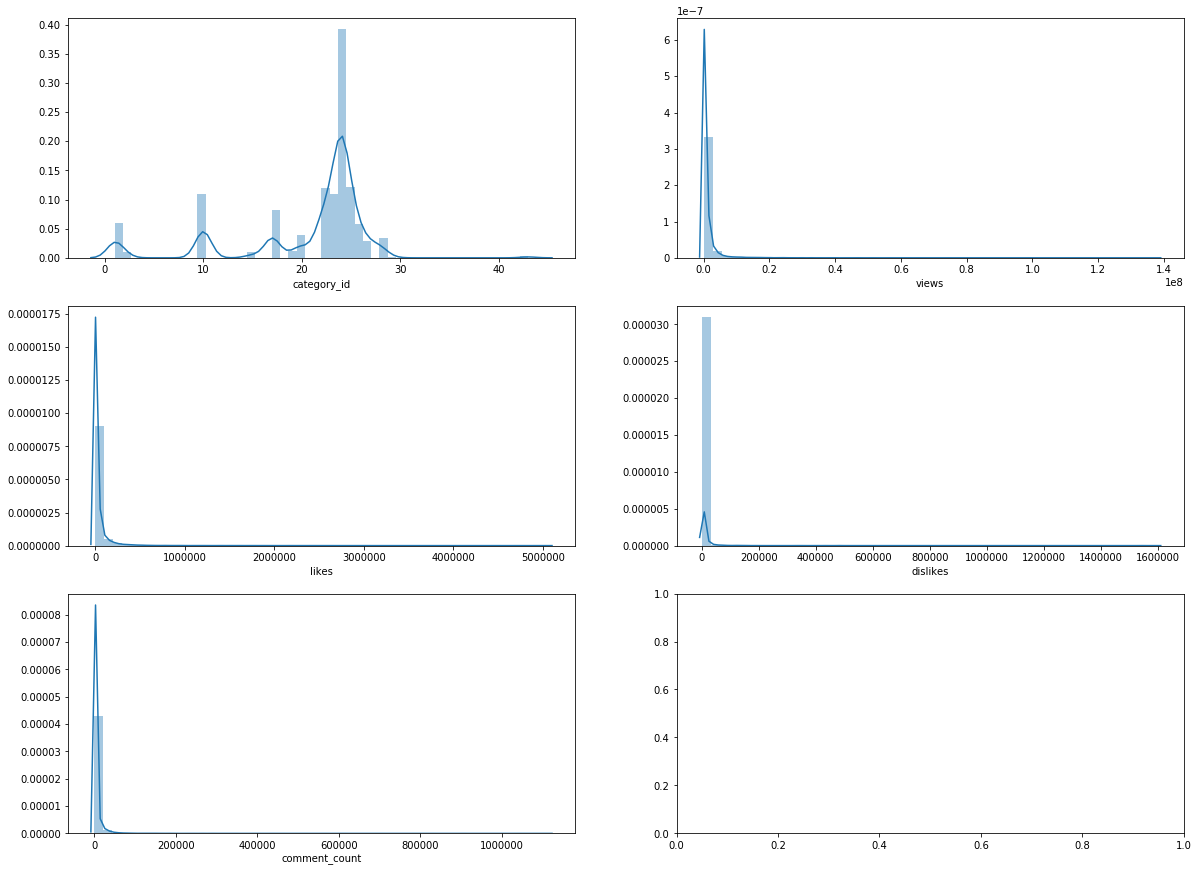

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#直方图
num_cols = ['category_id','views','likes','dislikes','comment_count']
fig, axes = plt.subplots(3,2, figsize=(20,15))
sns.distplot(data['category_id'][data['category_id'].notna()], ax = axes[0][0], kde = True)        # kde 密度曲线
sns.distplot(data['views'][data['views'].notna()], ax = axes[0][1], kde = True)        # kde 密度曲线 
sns.distplot(data['likes'][data['likes'].notna()], ax = axes[1][0], kde = True)        # kde 密度曲线 
sns.distplot(data['dislikes'][data['dislikes'].notna()], ax = axes[1][1], kde = True)        # kde 密度曲线 
sns.distplot(data['comment_count'][data['comment_count'].notna()], ax = axes[2][0], kde = True)        # kde 密度曲线 
plt.show() 

<Figure size 432x288 with 0 Axes>

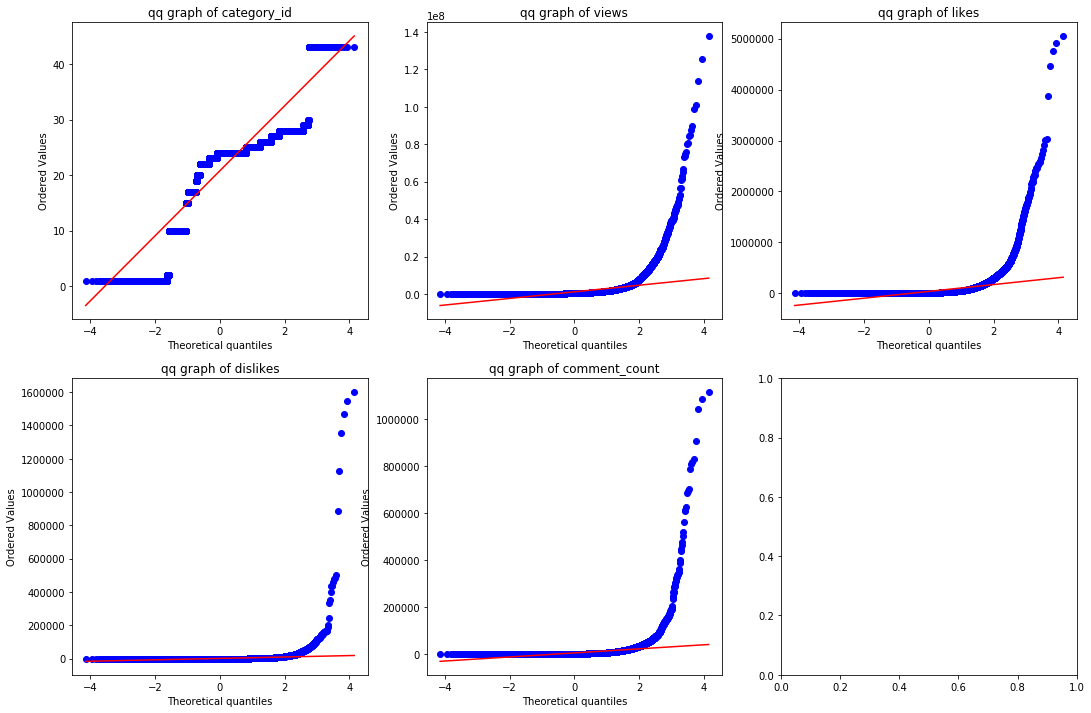

In [7]:
from scipy import stats
#QQ图
fig = plt.figure()
fig, ax = plt.subplots(2, 3,figsize=(18,12))
stats.probplot(data['category_id'][data['category_id'].notna()], dist="norm", plot=ax[0][0])
stats.probplot(data['views'][data['views'].notna()], dist="norm", plot=ax[0][1])
stats.probplot(data['likes'][data['likes'].notna()], dist="norm", plot=ax[0][2])
stats.probplot(data['dislikes'][data['dislikes'].notna()], dist="norm", plot=ax[1][0])
stats.probplot(data['comment_count'][data['comment_count'].notna()], dist="norm", plot=ax[1][1])
ax[0][0].set_title('qq graph of category_id')
ax[0][1].set_title('qq graph of views')
ax[0][2].set_title('qq graph of likes')
ax[1][0].set_title('qq graph of dislikes')
ax[1][1].set_title('qq graph of comment_count')
plt.show()

通过柱形图和qq图可以发现本数据集的5个数值属性都不太符合正态分布

<Figure size 432x288 with 0 Axes>

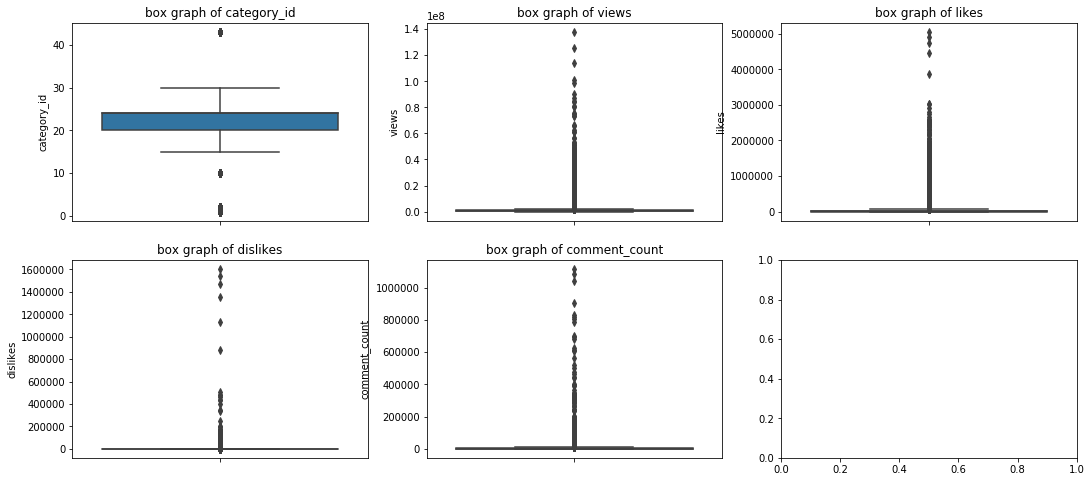

In [8]:
#盒图
fig = plt.figure()
fig, ax = plt.subplots(2, 3,figsize=(18,8))
sns.boxplot(y=data['category_id'],ax=ax[0][0])  
sns.boxplot(y=data['views'],ax=ax[0][1])  
sns.boxplot(y=data['likes'],ax=ax[0][2])  
sns.boxplot(y=data['dislikes'],ax=ax[1][0])  
sns.boxplot(y=data['comment_count'],ax=ax[1][1])  
ax[0][0].set_title('box graph of category_id')
ax[0][1].set_title('box graph of views')
ax[0][2].set_title('box graph of likes')
ax[1][0].set_title('box graph of dislikes')
ax[1][1].set_title('box graph of comment_count')
plt.show()

除catefory_id这个属性以外，其他属性都集中在数值较小的区域，同时有大量离群点（但是不应当做异常数据，因为本数据集是youtbe视频信息的数据，这种分布符合常识）

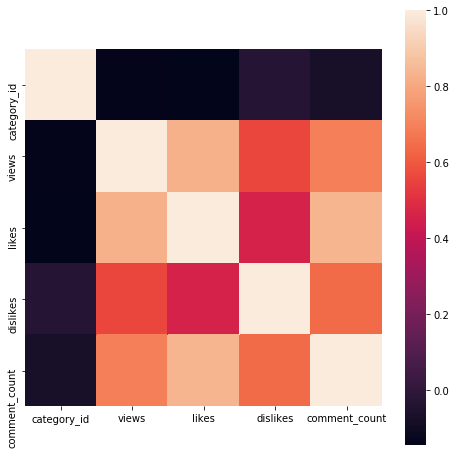

In [9]:
hitmapTemp = data[['category_id','views','likes','dislikes','comment_count']]
hitmapData = hitmapTemp.corr()
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(hitmapData, vmax=1, square=True)
plt.show()

由属性之间的协方差矩阵可以得到属性之间的相关性热力图，可以看到其他四个属性和category_id都没有什么关系，而其他四个属性之间都具有较强的相关性

## 2.数据缺失的处理

In [10]:
#观察缺失数据
lack_cols=data.columns
for c in lack_cols:
    num = data.shape[0]-data[c].count()
    print('%s has'%c,num,'nan value...')

video_id has 0 nan value...
trending_date has 0 nan value...
title has 0 nan value...
channel_title has 0 nan value...
category_id has 0 nan value...
publish_time has 0 nan value...
tags has 0 nan value...
views has 0 nan value...
likes has 0 nan value...
dislikes has 0 nan value...
comment_count has 0 nan value...
thumbnail_link has 0 nan value...
comments_disabled has 0 nan value...
ratings_disabled has 0 nan value...
video_error_or_removed has 0 nan value...
description has 1296 nan value...


发现只有1列数据（description）存在缺失，但是缺失量很低，实际应用中可以考虑直接丢弃

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
video_id                  40881 non-null object
trending_date             40881 non-null object
title                     40881 non-null object
channel_title             40881 non-null object
category_id               40881 non-null int64
publish_time              40881 non-null object
tags                      40881 non-null object
views                     40881 non-null int64
likes                     40881 non-null int64
dislikes                  40881 non-null int64
comment_count             40881 non-null int64
thumbnail_link            40881 non-null object
comments_disabled         40881 non-null bool
ratings_disabled          40881 non-null bool
video_error_or_removed    40881 non-null bool
description               39585 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


### 2.1将缺失值剔除

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39585 entries, 0 to 40880
Data columns (total 16 columns):
video_id                  39585 non-null object
trending_date             39585 non-null object
title                     39585 non-null object
channel_title             39585 non-null object
category_id               39585 non-null int64
publish_time              39585 non-null object
tags                      39585 non-null object
views                     39585 non-null int64
likes                     39585 non-null int64
dislikes                  39585 non-null int64
comment_count             39585 non-null int64
thumbnail_link            39585 non-null object
comments_disabled         39585 non-null bool
ratings_disabled          39585 non-null bool
video_error_or_removed    39585 non-null bool
description               39585 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.3+ MB


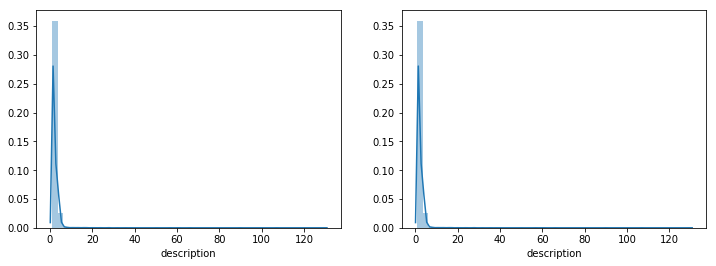

In [12]:
drop_1 = data.dropna(axis=0)
drop_1.info()
fig, axes = plt.subplots(1,2, figsize=(12, 4))
sns.distplot(data['description'].value_counts(),ax=axes[0],kde=True)
sns.distplot(drop_1['description'].value_counts(),ax=axes[1],kde=True)
plt.show()

通过画description属性各个值的数目的柱状图，发现删除空数据前后并没有明显变化，因为缺失数据量很少

### 2.2 用最高频率值填补缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
video_id                  40881 non-null object
trending_date             40881 non-null object
title                     40881 non-null object
channel_title             40881 non-null object
category_id               40881 non-null int64
publish_time              40881 non-null object
tags                      40881 non-null object
views                     40881 non-null int64
likes                     40881 non-null int64
dislikes                  40881 non-null int64
comment_count             40881 non-null int64
thumbnail_link            40881 non-null object
comments_disabled         40881 non-null bool
ratings_disabled          40881 non-null bool
video_error_or_removed    40881 non-null bool
description               40881 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


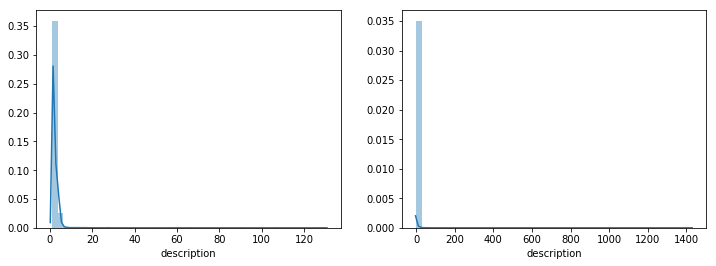

In [13]:
drop_2 = data.fillna(data.mode().iloc[0])
drop_2.info()
fig, axes = plt.subplots(1,2, figsize=(12, 4))
sns.distplot(data['description'].value_counts(),ax=axes[0],kde=True)
sns.distplot(drop_2['description'].value_counts(),ax=axes[1],kde=True)
plt.show()

由于description属性是视频的简介，因此无法用和其他属性的相关关系和与其他数据的相似性来填充空数据，在实际应用中这种属性的缺失值应该丢弃或者想办法补充数据，而不是进行填充